# <center>COLOR COMPRESSION PROJECT</center>

##### <CENTER> 21127141 - BÙI ĐỖ DUY QUÂN </CENTER>

### 1. Import libraries

In [97]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### 2. Some support functions

#### a. Reading image and showing image

In [98]:
def read_Image(filename):
    return np.array(Image.open(filename))

def show_Image(image):
    plt.imshow(image)
    plt.show()

def show_Image_side_by_side(image1, image2, k_clusters):

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))


    axes[0].imshow(image1)
    axes[0].axis('off')
    axes[0].set_title('Original Image', fontsize=16)

    axes[1].imshow(image2)
    axes[1].axis('off')
    axes[1].set_title('K = ' + str(k_clusters), fontsize=16)

    plt.subplots_adjust(wspace=0.05)
    plt.show()

#### b. Reshape image array 2D to 1D

In [99]:
#input: 2D image
#output: 1D image
def reshape_2D_to_1D(image2d):
    return np.ndarray((image2d.shape[0] * image2d.shape[1], image2d.shape[2]), 'uint8', image2d.astype('uint8'))

##### C. Unique color matrix in image

In [100]:
# input: 1D image
# output: 1D image of unique colors
def Unique_colors(image1d):
    return np.unique(image1d, axis=0).astype('int16')

#### D. Init centroids randomly and  in pixels in image

In [101]:
# input: K clusters, number of color channels
# output: an array K random centroids, each centroid has numchannels colors
def init_Random_Centroids(K_clusters, numchannels):
    return np.random.randint(0, 256, size = (K_clusters, numchannels)).astype('int16')

# input: K clusters, array of unique colors
# output: an array K random centroids, each centroid has numchannels colors
def init_Random_InPixel(K_clusters, UniqueColors):
    return np.array([UniqueColors[color] for color in np.random.choice(UniqueColors.shape[0], size = K_clusters, replace=False)]).astype('int16')

#### E. Reconstruct image from centroids and labels

In [102]:
#input: array of centroids and labels, 1D image, 2D image
#output: 2D image with new colors 
def reconstruct_Image(centroids, labels, img_1d, img_2d):
    new_img_1d = np.array([centroids[l] for l in labels]).astype('int16')
    
    return np.reshape(new_img_1d, (img_2d.shape[0], img_2d.shape[1], img_2d.shape[2]))

    

### 3. K-means algorithm

#### a. Getting labels for each pixel

In [103]:
# input: 1D image, array of centroids
# output: array of labels of each pixel
def get_Labels(img_1d, centroids):
    #broadcasting and slicing method to find the distance between each pixel and each centroid
    return np.argmin(np.sum((((img_1d[:, None] - centroids[None, :]).astype('int64')) ** 2), axis=-1), axis = -1).astype('uint16')


#### b. Updating centroids

In [104]:
# input: 1D image, array of labels, K colors
# output: array having K centroids that updated
def update_Centroids(img_1d, labels, K_clusters):
    centroids = np.zeros((K_clusters, img_1d.shape[1])).astype('int64')

    # counting number of pixels in each cluster
    counts_of_labels = np.zeros(K_clusters).astype('int64')

    # summing up the values of each pixel in each cluster
    for color, label in zip(img_1d, labels):
        centroids[label] += color
        counts_of_labels[label] += 1
    
    for i, count in enumerate(counts_of_labels):
        if count != 0:
            centroids[i] = (centroids[i] / count)
        else:
            centroids[i] = np.zeros(img_1d.shape[1])
            
    return centroids

#### c. Stop condition

In [105]:
#input: old centroids, new centroids, threshold
#output: boolean value whether the centroids are close enough
def stop_Condition(old_centroids, new_centroids, threshold=1e-5):
    dis = np.sum(((old_centroids - new_centroids).astype('int64'))**2, axis=-1)
    return sum(dis) <= threshold
    

#### c. Implementing K-means algorithm

In [106]:
# input: 1D image, K clusters (number of colors in new image), max iterations (), init centroids
# output: array of centroids, array of labels
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    
    #Create Unique Colors Array
    UniqueColors = Unique_colors(img_1d)
    
    #Init Centroids
    if init_centroids == 'random':
        centroids = init_Random_Centroids(k_clusters, img_1d.shape[1])
    elif init_centroids == 'in_pixels':
        centroids = init_Random_InPixel(k_clusters, UniqueColors)
    else:
        print('Wrong init_centroids parameter')
        return None

    
    
    for _ in range (max_iter):
    
        labels = get_Labels(img_1d, centroids)

        old_centroids = centroids.copy()

        centroids = update_Centroids(img_1d, labels, k_clusters)


        if stop_Condition(old_centroids, centroids):
            break

    return centroids, labels

        
            

#### 4. Main function

In [107]:
def main():
    file_image = input("Enter file image name: ")
    K_clusters = int(input("Enter K clusters: "))
    max_iter = int(input("Enter max iterations: "))
    init_centroids = input("Enter init centroids (random or in_pixels): ")
    Output_type = input("Enter output type (pdf or png): ")


    img_2d = read_Image(file_image)
    img_1d = reshape_2D_to_1D(img_2d)

    centroids, labels = kmeans(img_1d, K_clusters, max_iter, init_centroids)
    new_img_2d = reconstruct_Image(centroids, labels, img_1d, img_2d)

    if Output_type == 'pdf':
        plt.imsave('Result.pdf', new_img_2d.astype('uint8'))
    elif Output_type == 'png':
        plt.imsave('Result.png', new_img_2d.astype('uint8'))
    else:
        print('Wrong Output_type parameter')
        return None
    
    show_Image_side_by_side(img_2d, new_img_2d, K_clusters)

### 5. Results

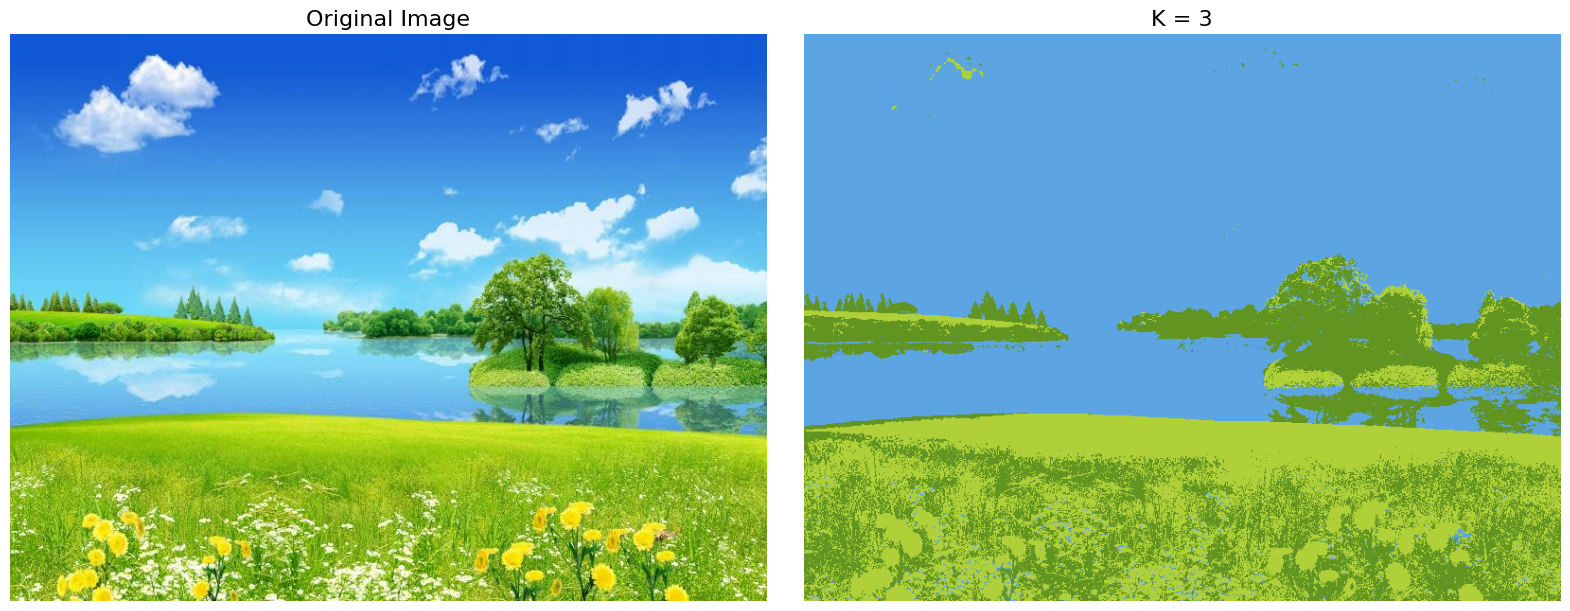

In [108]:
if __name__ == "__main__":
    main()